![logo.png]()___

<img src="logo.png" class="img-fluid" width="1000" height="300">

___

# Fraud Detection Project 

# Hi!

The implemented models are ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualized performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project,the model is deployed using ***Flask API***.

---
---


# #Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. <br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent.
First of all, I analyze and recognize the data well in order to draw my roadmap and choose the correct arguments I will use. Accordingly, I examine the frequency distributions of variables. I observe variable correlations and want to explore multicollinearity. I show the distribution of the target variable's classes over other variables. 
Also, I take missing values and outliers.

After these procedures, I move on to the model building stage by doing the basic data pre-processing.

I start with Logistic Regression and evaluate model performance. I apply the SMOTE technique used to increase the sample for unbalanced data. Next, I rebuild Logistic Regression model with SMOTE applied data to observe its effect.

Then, I use three different algorithms in the model building phase. 

In the final step, I deploy the model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployment

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [30]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
data = pd.read_csv("creditcard.csv")
df = data.copy()
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79173,57901.0,-1.157429,0.411974,0.252788,-0.098480,-1.080788,-0.912002,1.548597,0.200760,-0.280725,...,0.247870,0.288982,0.626936,0.711185,-0.311980,0.269065,0.128524,0.191770,277.50,0
84711,60429.0,1.084043,0.346399,0.986814,2.777130,-0.339132,0.131382,-0.126961,0.108577,-0.213722,...,-0.029271,0.131307,-0.012193,0.412223,0.505458,0.087169,0.024554,0.020665,7.83,0
68253,52899.0,-2.121557,-1.990627,1.551627,-0.456067,-0.813511,0.107657,-1.047652,-0.065758,-1.570810,...,-0.482476,0.341100,0.381064,0.076602,0.208591,0.169115,0.152733,0.389538,88.33,0
110537,71862.0,-0.493896,1.012864,1.688744,-0.096791,-0.016113,-0.702086,0.618577,0.034815,-0.762679,...,-0.153223,-0.394162,-0.013115,0.533992,-0.228636,0.039016,0.265112,0.114923,1.29,0
922,696.0,1.147380,-0.382257,1.135522,0.119209,-1.003615,0.026161,-0.711777,0.145659,0.999927,...,-0.075528,0.006935,0.071130,0.179123,0.053655,1.016155,-0.016534,0.016708,22.61,0
157074,109465.0,-0.303967,1.250409,1.609933,3.530058,1.303071,0.393169,0.885146,-0.223778,-0.565484,...,0.067093,0.714279,-0.239321,0.050702,-0.323420,0.068560,-0.025891,-0.048098,7.55,0
68581,53049.0,-1.994155,-0.817220,0.758527,0.854452,-1.208572,0.046239,1.093162,-0.109247,0.781560,...,-0.297793,0.366335,0.974921,0.450034,0.016782,0.313342,-0.331239,-0.172191,274.67,0


### Exploratory Data Analysis

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## Class Analysis against other Features

#### Distribution of 1,0 in Class

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


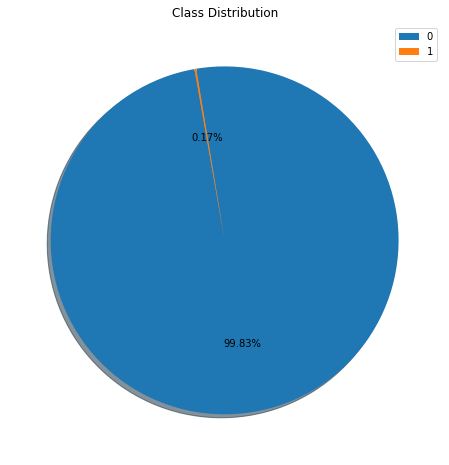

In [12]:
# The classes are heavily skewed we need to solve this issue later.
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(df['Class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [13]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

###### Dataset is highly imbalanced

#### Statistical Measure of the data

In [14]:
#legit
df[df.Class == 0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#fraud
df[df.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Corr of other features with Class

In [31]:
df.corr()["Class"].drop(index="Class").sort_values(ascending=False).iplot(kind = "bar")

### Exploring Highly Correlated Features

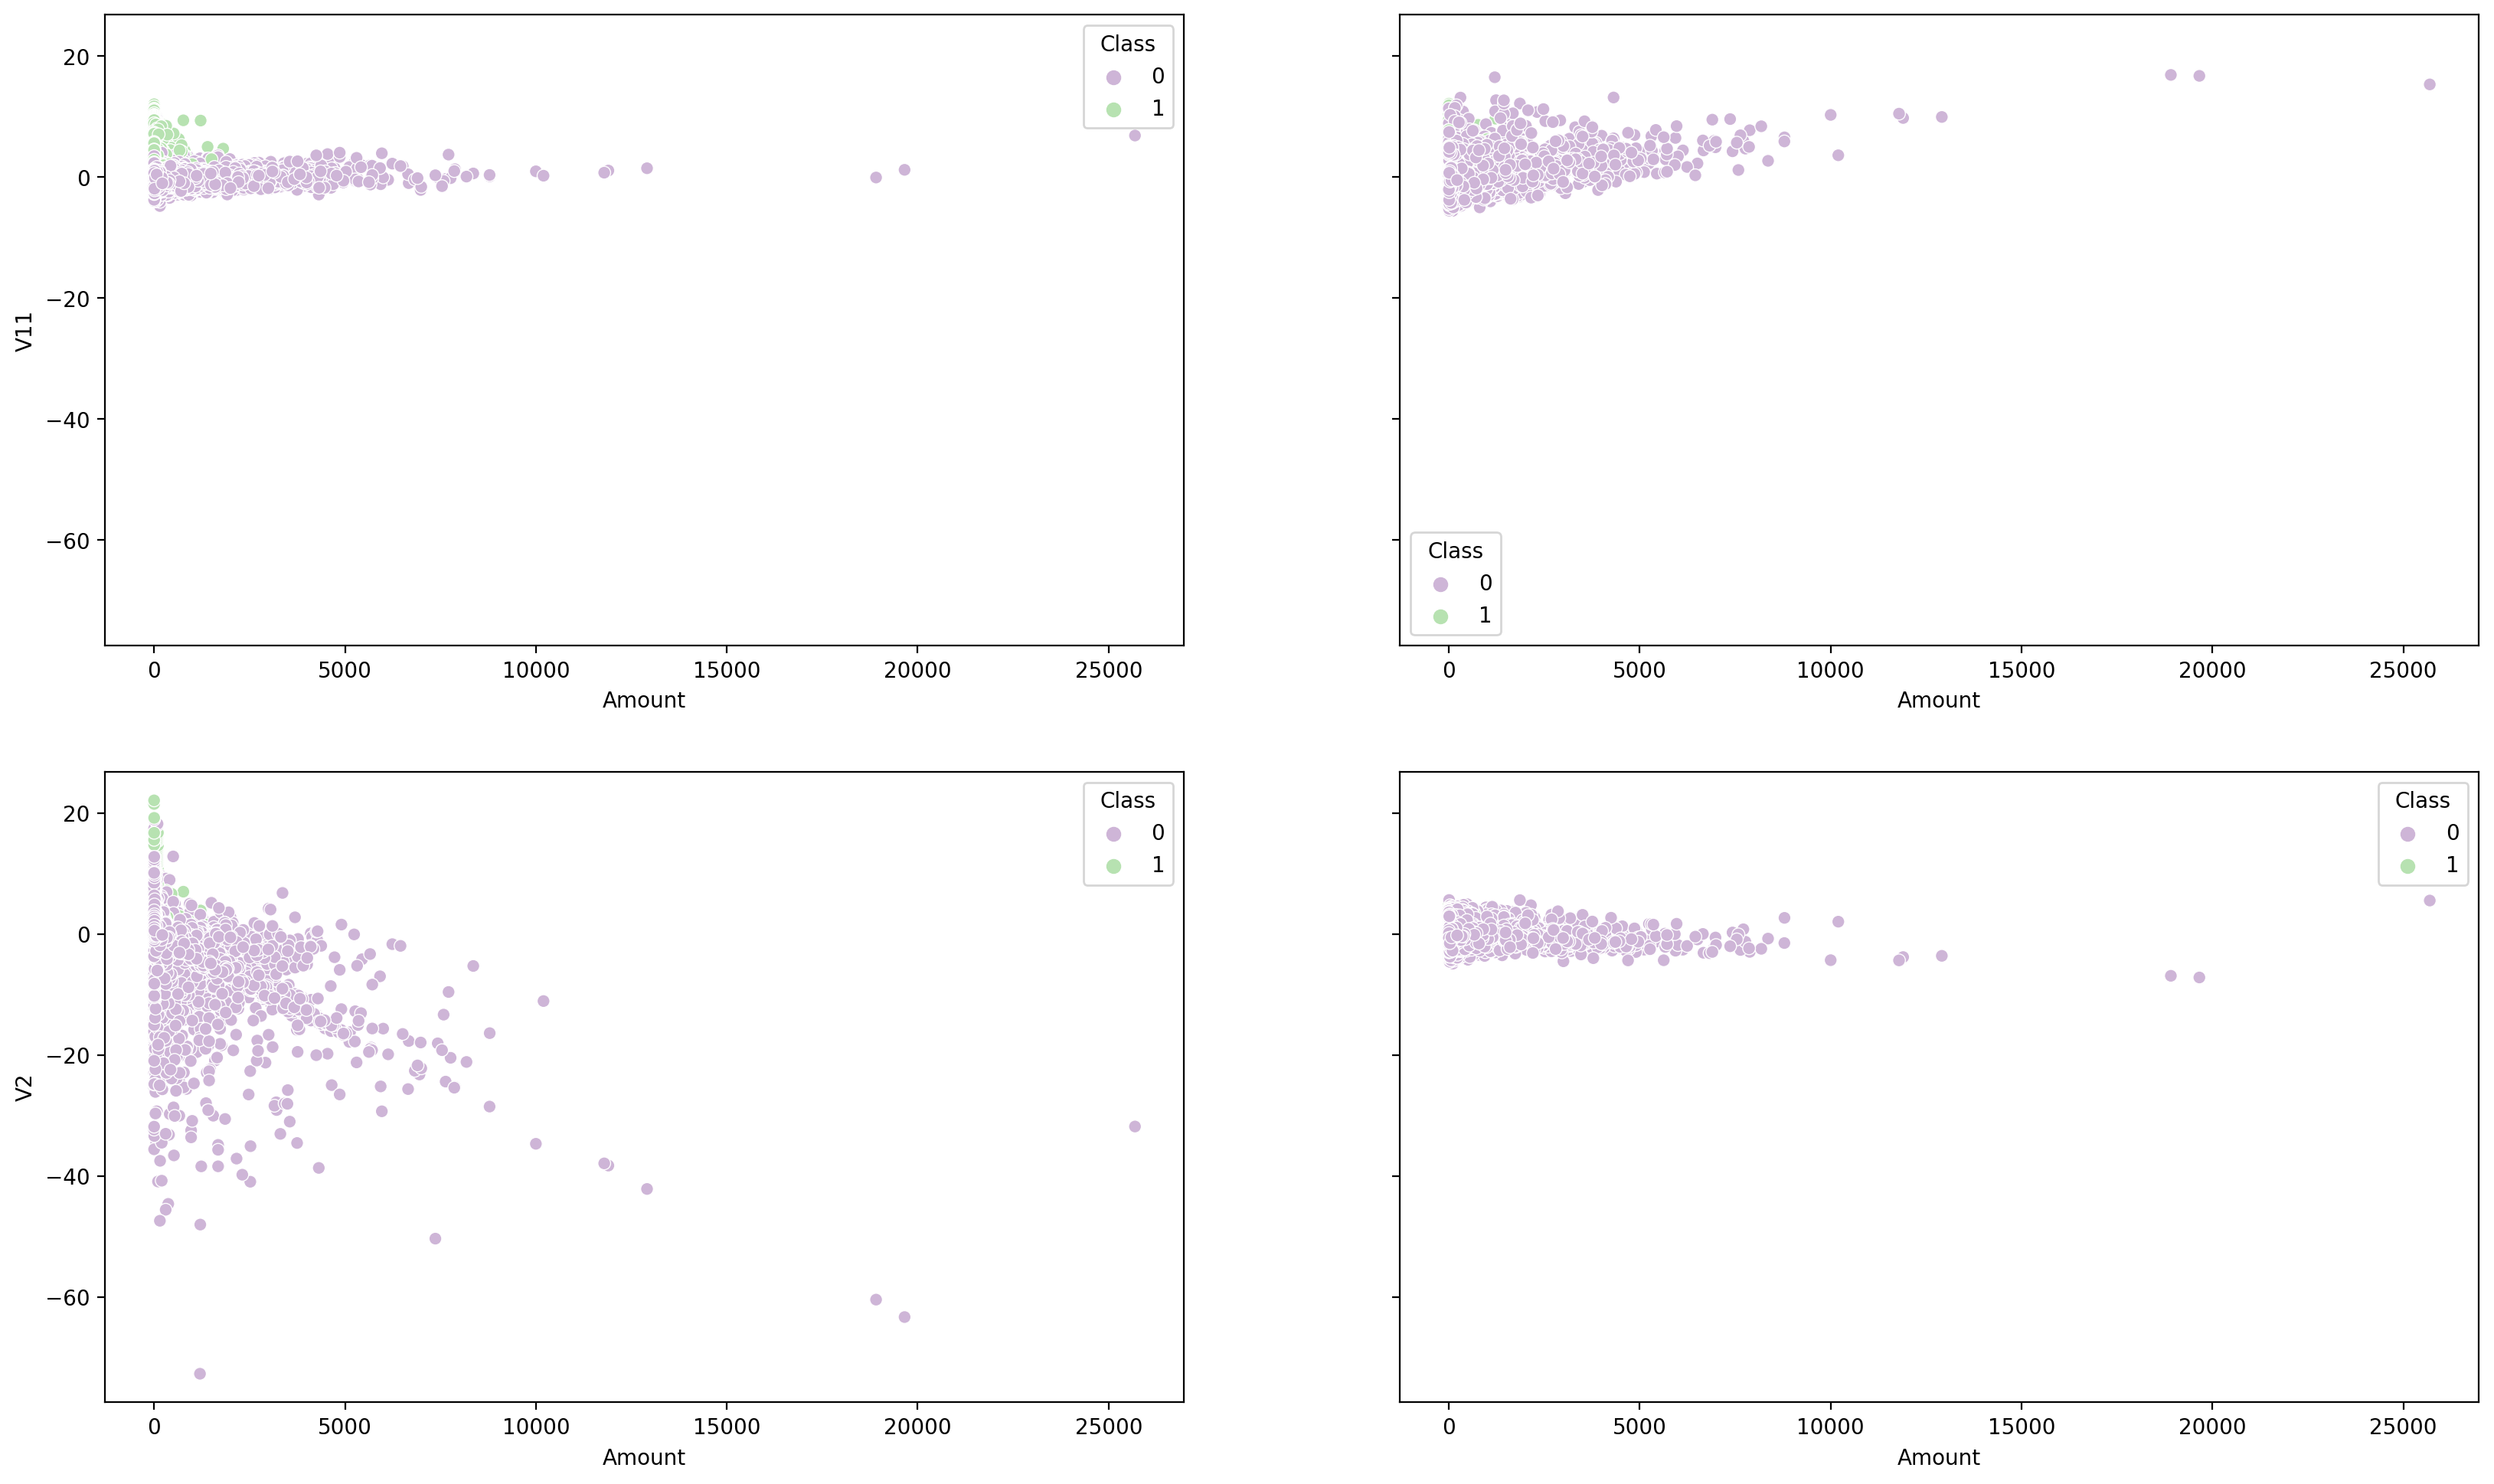

In [17]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

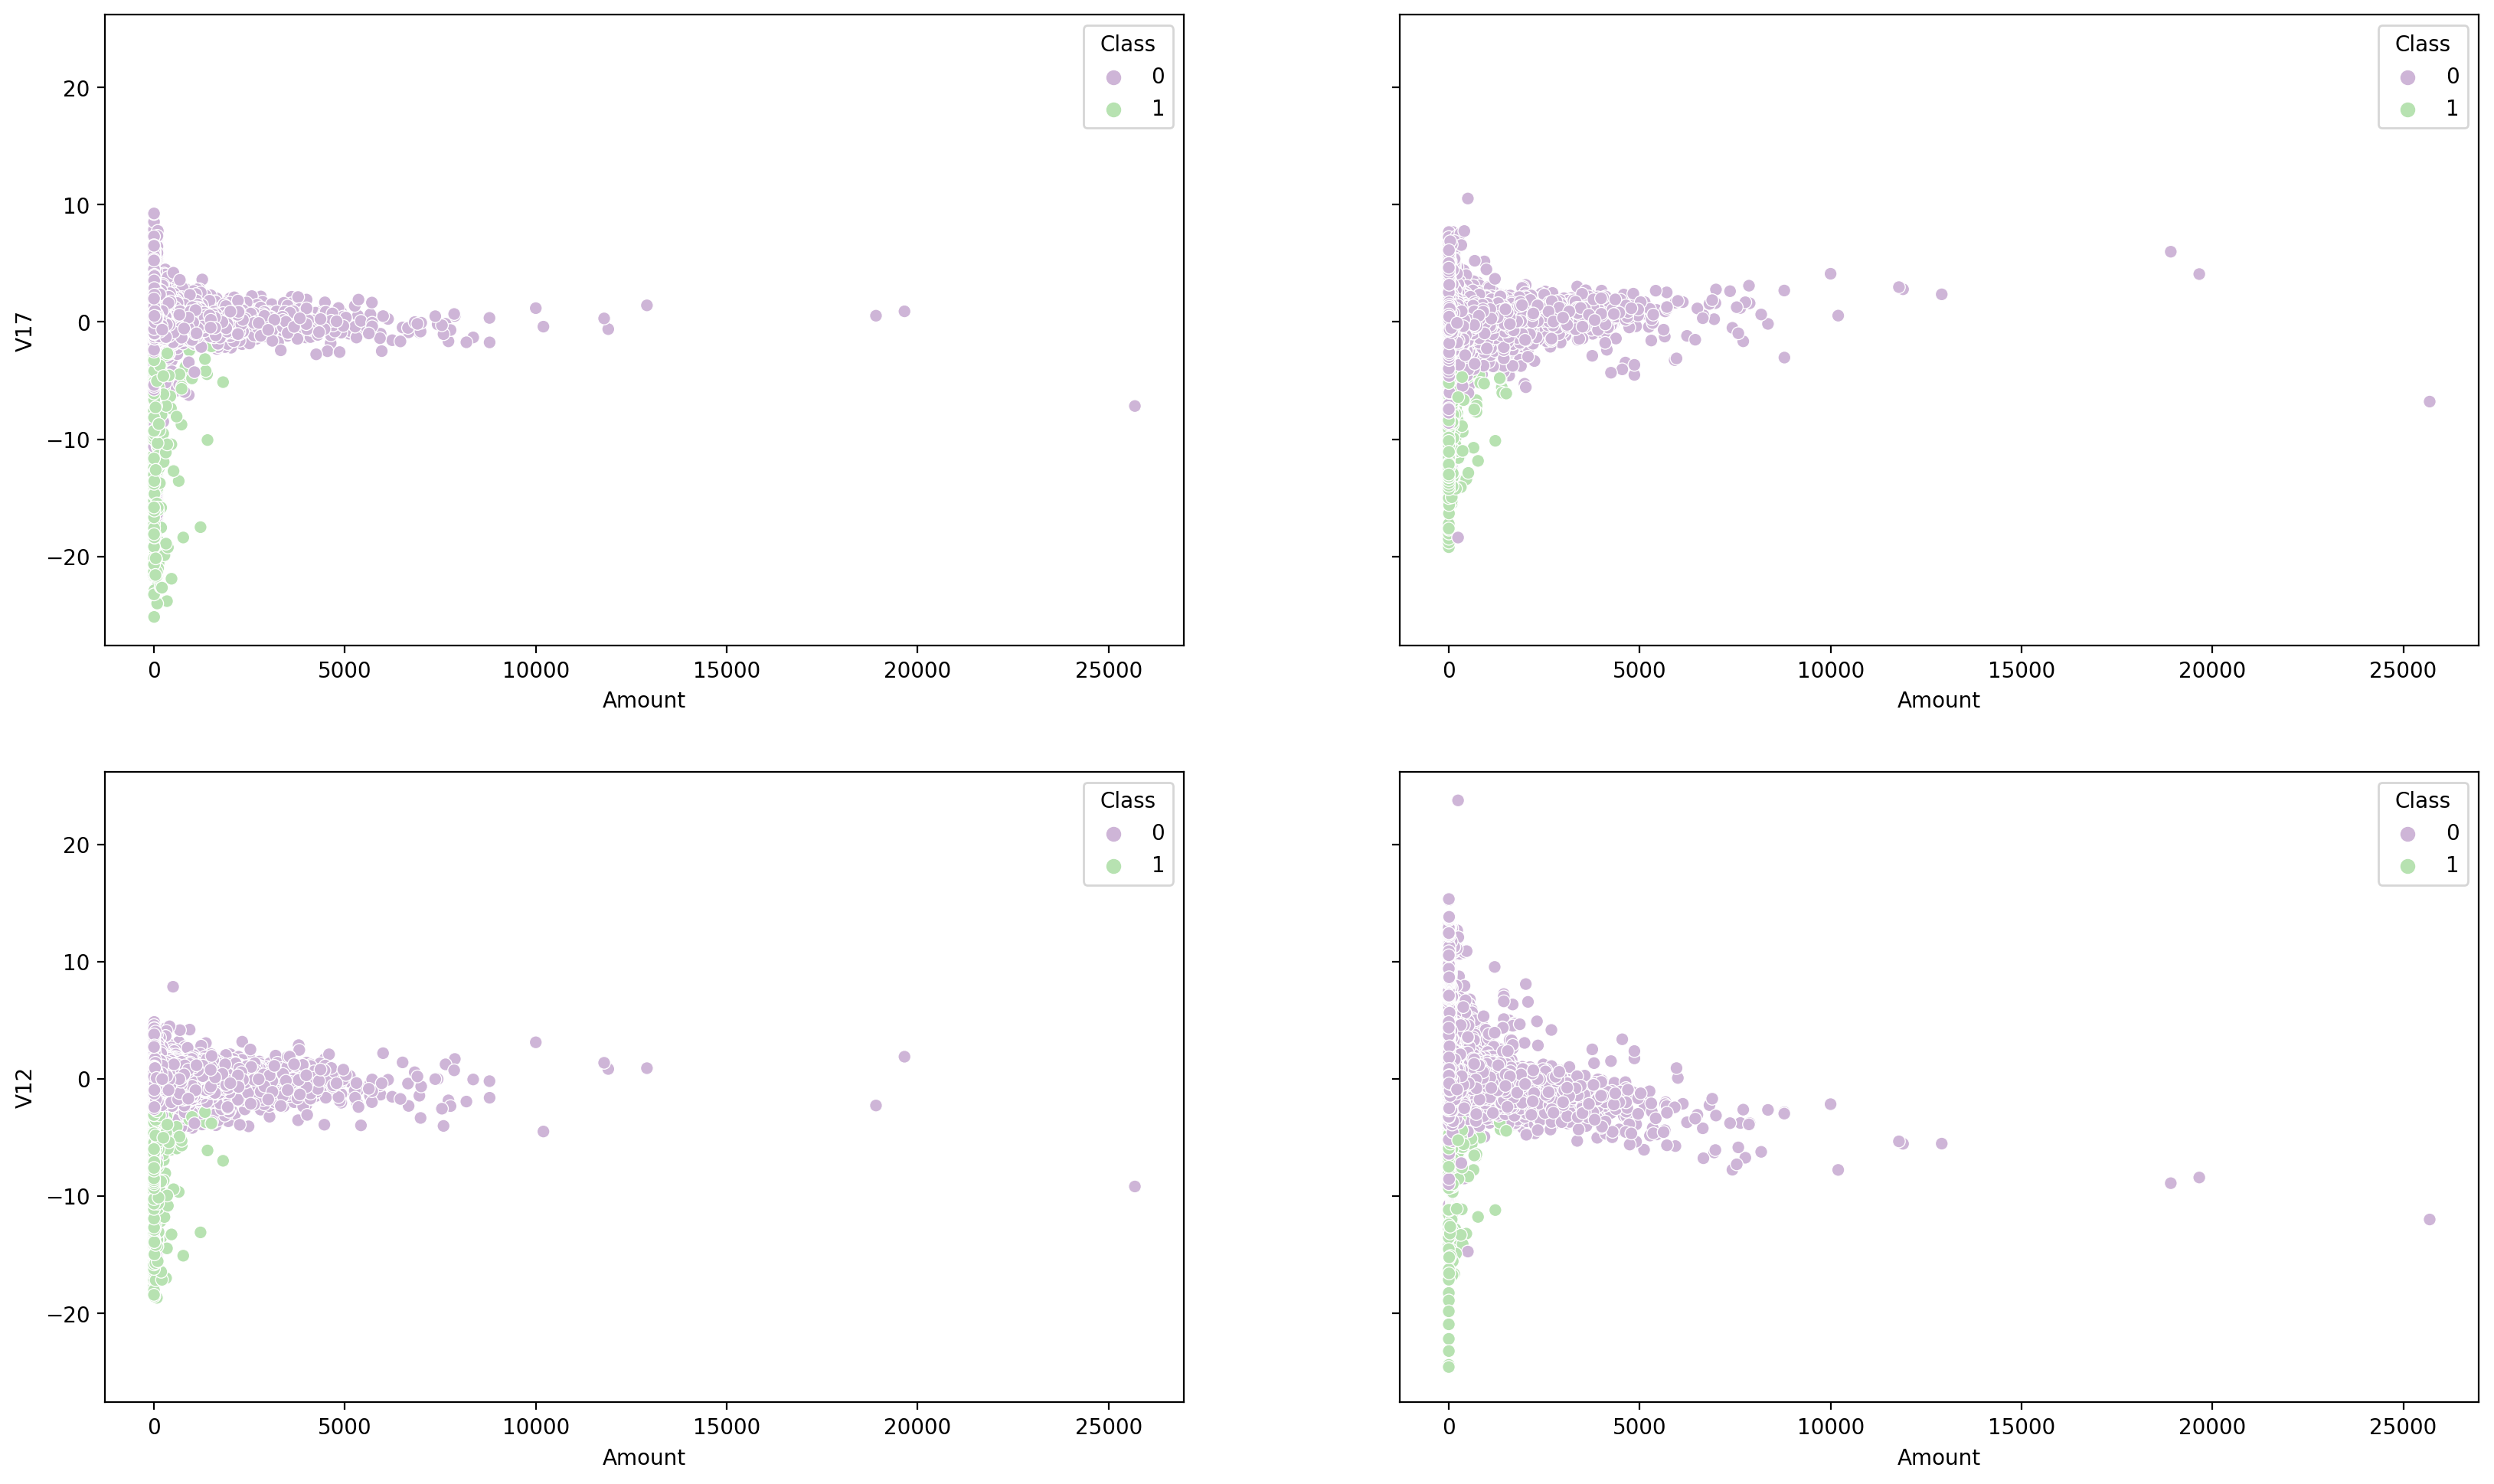

In [15]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='PRGn');

In [18]:
df["V17"].describe()

count    283726.000000
mean          0.000170
std           0.842507
min         -25.162799
25%          -0.483928
50%          -0.065867
75%           0.398972
max           9.253526
Name: V17, dtype: float64

In [19]:
df[(df["V17"]< 0.4 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [20]:
df["V14"].describe()

count    283726.000000
mean          0.000252
std           0.952215
min         -19.214325
25%          -0.425732
50%           0.050209
75%           0.492336
max          10.526766
Name: V14, dtype: float64

In [20]:
df[(df["V14"]< 0.5 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
df["V12"].describe()

count    283726.000000
mean         -0.000715
std           0.994674
min         -18.683715
25%          -0.406198
50%           0.139072
75%           0.616976
max           7.848392
Name: V12, dtype: float64

In [20]:
df[(df["V12"]< 0.1 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [21]:
df["V10"].describe()

count    283726.000000
mean         -0.001441
std           1.076407
min         -24.588262
25%          -0.535578
50%          -0.093237
75%           0.453619
max          23.745136
Name: V10, dtype: float64

In [22]:
df[(df["V10"]< 0.2 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [23]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [23]:
df_filter = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]
df_filter

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284773,172761.0,-0.066136,0.996296,-0.918564,-0.923242,1.256522,0.047446,0.705820,0.232330,0.213157,...,-0.397210,-1.038099,0.002120,-0.512741,-0.349721,0.168693,0.316674,0.120065,3.57,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [26]:
df_filter.Class.value_counts()

0    32547
1      473
Name: Class, dtype: int64

In [27]:
df_filter.Class.value_counts(normalize=True)

0    0.985675
1    0.014325
Name: Class, dtype: float64

### Data Cleaning
Check Missing Values and Outliers

In [28]:
df.isnull().any().sum()

0

## Distribution

In [29]:
# sns.pairplot(df, palette='PRGn')

## Outliers

In [24]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_filter, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

4342 outliers in 'V1'
8872 outliers in 'V2'
1764 outliers in 'V3'
4750 outliers in 'V4'
5985 outliers in 'V5'
18954 outliers in 'V6'
5725 outliers in 'V7'
17099 outliers in 'V8'
2915 outliers in 'V9'
5624 outliers in 'V10'
312 outliers in 'V11'
8214 outliers in 'V12'
403 outliers in 'V13'
6998 outliers in 'V14'
565 outliers in 'V15'
2860 outliers in 'V16'
3899 outliers in 'V17'
1717 outliers in 'V18'
4449 outliers in 'V19'
20631 outliers in 'V20'
11071 outliers in 'V21'
599 outliers in 'V22'
13211 outliers in 'V23'
446 outliers in 'V24'
2206 outliers in 'V25'
1254 outliers in 'V26'
27395 outliers in 'V27'
21051 outliers in 'V28'
25950 outliers in 'Amount'

229261 OUTLIERS TOTALLY


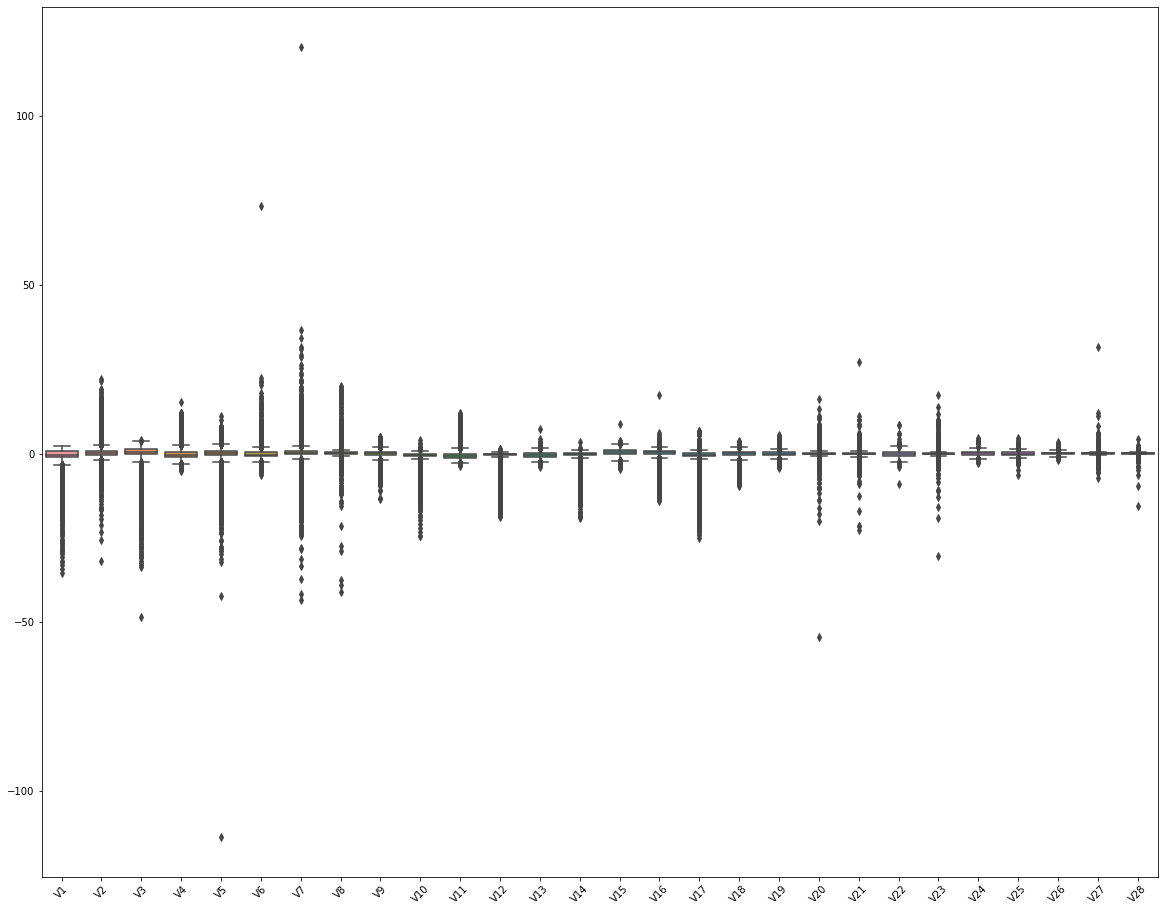

In [35]:
plt.figure(figsize=(20,16))
sns.boxplot(data = df_filter.loc[:,(df_filter.columns != 'Time') & (df_filter.columns != 'Amount')& (df_filter.columns != 'Class')])
plt.xticks(rotation=45);
#There are outliers on this dataset.

In [36]:
df_filter[df_filter.Class == 0].Amount.describe()

count    32547.000000
mean        94.274576
std        324.566115
min          0.000000
25%          4.260000
50%         18.710000
75%         70.000000
max      25691.160000
Name: Amount, dtype: float64

In [37]:
df_filter[df_filter.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [38]:
df_filter[df_filter.Class == 0].Time.describe()

count     32547.000000
mean      93890.345009
std       46473.829905
min           0.000000
25%       54425.000000
50%       80167.000000
75%      138588.000000
max      172792.000000
Name: Time, dtype: float64

In [39]:
df_filter[df_filter.Class == 1].Time.describe()

count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

- When I do outliers removal, it deletes all the values where Class==1. 
- It means that, the activities of fradulastes are outliers.

---
---


## 2. Data Preprocessing

- orjinal data ile

In [26]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import optuna

## Sadece scaler edilerek Modellerin karşılasştırılması 

In [27]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

C:\Users\Enes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

## Df_filter isminde olusturulan datanın sadece scaler edilerek modellerinin karşılaştırılması

In [42]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []


for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

C:\Users\SFS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
3,ADA,0.999192,0.999481,0.962121,0.982405,0.969466,0.982405,0.976923,0.982405
4,RF,0.998890,1.000000,0.946970,1.000000,0.957854,1.000000,0.968992,1.000000
0,XGB,0.998789,1.000000,0.931818,1.000000,0.953488,1.000000,0.976190,1.000000
2,GBC,0.998486,0.999957,0.931818,0.997067,0.942529,0.998532,0.953488,1.000000
1,LightGBM,0.997779,1.000000,0.886364,1.000000,0.914062,1.000000,0.943548,1.000000
6,SVM,0.997476,0.998572,0.833333,0.920821,0.897959,0.950076,0.973451,0.981250
5,LR,0.995356,0.995414,0.787879,0.780059,0.818898,0.833856,0.852459,0.895623


- Smote ile

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

#### Scaling

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

***ii. Model Training***

In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Df_filter datasını Smote ve scale ederek model karşılaştırılması

In [49]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

C:\Users\SFS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
1,LightGBM,0.997696,1.000000,0.996928,1.000000,0.997694,1.000000,0.998462,1.000000
0,XGB,0.997184,1.000000,0.996416,1.000000,0.997182,1.000000,0.997949,1.000000
4,RF,0.996416,1.000000,0.994368,1.000000,0.996408,1.000000,0.998458,1.000000
3,ADA,0.995648,0.997695,0.992832,0.997147,0.995635,0.997694,0.998455,0.998242
2,GBC,0.993344,0.998354,0.989247,0.997805,0.993316,0.998353,0.997419,0.998901
6,SVM,0.990015,0.991440,0.984639,0.985294,0.989961,0.991387,0.995342,0.997556
5,LR,0.982335,0.984965,0.973374,0.976514,0.982175,0.984837,0.991137,0.993302


## Scale ve smote uygulanarak DF_filter datasının LGBMC modeli için Test ve train sonuçları 

---------------------Test Scores---------------------
[[1950    3]
 [   6 1947]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1953
           1       1.00      1.00      1.00      1953

    accuracy                           1.00      3906
   macro avg       1.00      1.00      1.00      3906
weighted avg       1.00      1.00      1.00      3906

---------------------Train Scores---------------------
[[4556    0]
 [   0 4556]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4556
           1       1.00      1.00      1.00      4556

    accuracy                           1.00      9112
   macro avg       1.00      1.00      1.00      9112
weighted avg       1.00      1.00      1.00      9112



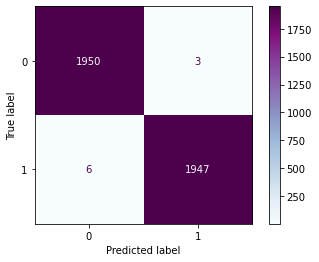

In [53]:
lgbmc_model= LGBMClassifier(random_state=42)
lgbmc_model.fit(X_train, y_train)
y_pred = lgbmc_model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model, X_test, y_test,cmap="BuPu");

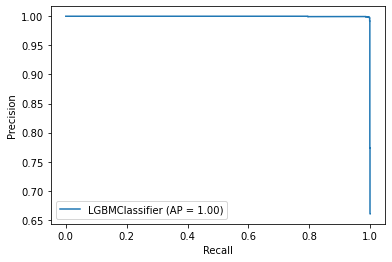

In [54]:
plot_precision_recall_curve(lgbmc_model, X_test, y_test);

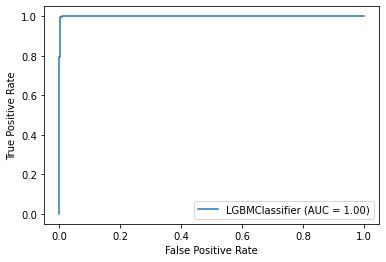

In [55]:
plot_roc_curve(lgbmc_model,X_test,y_test);

## - Df_filter datasının Optuna ile optimazsyonu

In [23]:
def objective(trial):
    X= df_filter.drop('Class', axis=1)
    y= df_filter['Class']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {"n_estimators": trial.suggest_int("n_estimators",100, 500),
        "max_depth": trial.suggest_int("max_depth",2, 16),
        "learning_rate": trial.suggest_float("learning_rate", 0.01 , 0.1),
        "subsample": trial.suggest_float("subsample",0.2, 1),
    }

    lgbmc_model_optuna = LGBMClassifier(**param,random_state=42)

    lgbmc_model_optuna.fit(X_train, y_train)

    preds = lgbmc_model_optuna.predict(X_test)
    pred_labels = np.rint(preds)
    recall = recall_score(y_test, pred_labels)
    return recall

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600,)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-12-22 22:50:46,088] A new study created in memory with name: no-name-d29d6ff6-c2fb-4dc0-9aea-d7414a97e60a
[I 2021-12-22 22:50:46,948] Trial 0 finished with value: 0.8863636363636364 and parameters: {'n_estimators': 209, 'max_depth': 8, 'learning_rate': 0.07831748025122454, 'subsample': 0.6334762605887838}. Best is trial 0 with value: 0.8863636363636364.
[I 2021-12-22 22:50:47,314] Trial 1 finished with value: 0.9015151515151515 and parameters: {'n_estimators': 116, 'max_depth': 6, 'learning_rate': 0.06163160585289255, 'subsample': 0.7907762046493763}. Best is trial 1 with value: 0.9015151515151515.
[I 2021-12-22 22:50:48,377] Trial 2 finished with value: 0.8863636363636364 and parameters: {'n_estimators': 420, 'max_depth': 12, 'learning_rate': 0.07182107390469768, 'subsample': 0.6391030436398741}. Best is trial 1 with value: 0.9015151515151515.
[I 2021-12-22 22:50:49,407] Trial 3 finished with value: 0.8939393939393939 and parameters: {'n_estimators': 283, 'max_depth': 10, 'lea

Number of finished trials: 50
Best trial:
  Value: 0.9015151515151515
  Params: 
    n_estimators: 116
    max_depth: 6
    learning_rate: 0.06163160585289255
    subsample: 0.7907762046493763


In [36]:
lgbmc_model_optuna = LGBMClassifier(n_estimators=395,max_depth=9,learning_rate=0.08548314119533634,subsample = 0.7157088641100996)

- Optuna ile best parametreler bulundu ve model oluşturuldu

---------------------Test Scores---------------------
[[9755    9]
 [  12  130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9764
           1       0.94      0.92      0.93       142

    accuracy                           1.00      9906
   macro avg       0.97      0.96      0.96      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores---------------------
[[22783     0]
 [    0   331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22783
           1       1.00      1.00      1.00       331

    accuracy                           1.00     23114
   macro avg       1.00      1.00      1.00     23114
weighted avg       1.00      1.00      1.00     23114



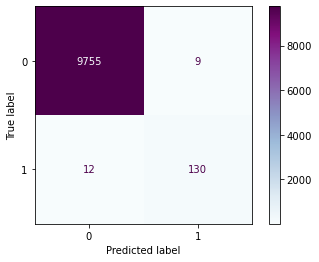

In [26]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

lgbmc_model_optuna.fit(X_train, y_train)
y_pred = lgbmc_model_optuna.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model_optuna.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model_optuna, X_test, y_test,cmap="BuPu");

## Df_filter ile feature Importance

In [32]:
feature_importance = lgbmc_model_optuna.feature_importances_
features = df_filter.drop(columns="Class").columns
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="LGBMC Feature Importance",height=500)
fig.show()

NameError: name 'lgbmc_model_optuna' is not defined

## Seçilen sutunlara smote uygulanmadan default(Cross validation olmadan) sonuclar

---------------------Test Scores---------------------
[[9753   11]
 [  16  126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9764
           1       0.92      0.89      0.90       142

    accuracy                           1.00      9906
   macro avg       0.96      0.94      0.95      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores---------------------
[[22778     5]
 [    7   324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22783
           1       0.98      0.98      0.98       331

    accuracy                           1.00     23114
   macro avg       0.99      0.99      0.99     23114
weighted avg       1.00      1.00      1.00     23114



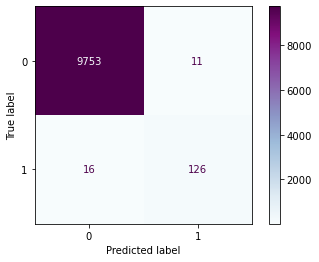

In [38]:
df_filter_feature = df_filter[["V4","V11","V14","V12","V17","V10"]]
df_filter_feature["Class"] = df.Class
X = df_filter_feature.drop(columns="Class")
y = df_filter_feature.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgbmc_model_optuna.fit(X_train, y_train)
y_pred = lgbmc_model_optuna.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model_optuna.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model_optuna, X_test, y_test,cmap="BuPu");

## Smote uygulanarak elde edilen sonuçlar

---------------------Test Scores---------------------
[[1948    5]
 [  14 1939]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1953
           1       1.00      0.99      1.00      1953

    accuracy                           1.00      3906
   macro avg       1.00      1.00      1.00      3906
weighted avg       1.00      1.00      1.00      3906

---------------------Train Scores---------------------
[[4555    1]
 [   0 4556]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4556
           1       1.00      1.00      1.00      4556

    accuracy                           1.00      9112
   macro avg       1.00      1.00      1.00      9112
weighted avg       1.00      1.00      1.00      9112



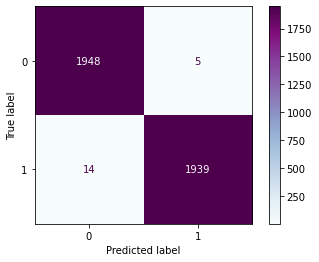

In [39]:
over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgbmc_model_optuna.fit(X_train, y_train)
y_pred = lgbmc_model_optuna.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model_optuna.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model_optuna, X_test, y_test,cmap="BuPu");

## orjinal data ve seçilen sutunlar ile yeni data oluşturulması ve  smothe uygulanaması sonrası sonuçları

---------------------Test Scores---------------------
[[16889   106]
 [   54 16941]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     16995
           1       0.99      1.00      1.00     16995

    accuracy                           1.00     33990
   macro avg       1.00      1.00      1.00     33990
weighted avg       1.00      1.00      1.00     33990

---------------------Train Scores---------------------
[[39634    21]
 [    3 39652]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



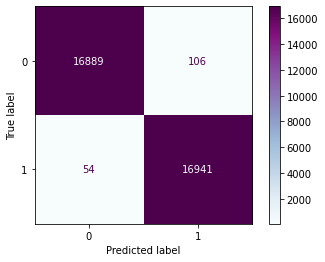

In [44]:
df_final = df[["V4","V11","V14","V12","V17","V10"]]
df_final["Class"] = df.Class
X = df_final.drop(columns="Class")
y = df_final.Class

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgbmc_model_optuna.fit(X_train, y_train)
y_pred = lgbmc_model_optuna.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model_optuna.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model_optuna, X_test, y_test,cmap="BuPu");

In [41]:
df[df.Class == 1].iloc[:,[4,10,11,12,14,17]]

,V4,V10,V11,V12,V14,V17
541,3.997906,-2.772272,3.202033,-2.899907,-4.289254,-2.830056
623,2.288644,-0.838587,-0.414575,-0.503141,-1.692029,0.599717
4920,2.330243,-1.525412,2.032912,-6.560124,-1.470102,-4.781831
6108,2.679787,-4.801637,4.895844,-10.912819,-6.771097,-12.598419
6329,4.732795,-2.447469,2.101344,-4.609628,-6.079337,6.739384
...,...,...,...,...,...,...
279863,1.749293,-5.587794,2.115795,-5.417424,-6.665177,-4.570529
280143,1.411850,-3.232153,2.858466,-3.096915,-5.210141,-3.267116
280149,0.468308,-3.463891,1.794969,-2.775022,-4.057162,-5.035326
281144,1.817092,-5.245984,1.933520,-5.030465,-6.416628,-4.614717


In [43]:
V4, V10, V11, V12, V14, V17 = 0.408670,-0.888722,0.491140,0.728903,-1.948883,0.903562
mylist = [[V4, V10, V11, V12, V14, V17]]
data = pd.DataFrame(mylist, columns= ["V4", "V10", "V11", "V12", "V14", "V17"])
data

,V4,V10,V11,V12,V14,V17
0,0.40867,-0.888722,0.49114,0.728903,-1.948883,0.903562


In [45]:
scaler = StandardScaler()


In [49]:
data = scaler.transform(data)

In [50]:
data

array([[-0.40867 ,  0.888722, -0.49114 , -0.728903,  1.948883, -0.903562]])

In [51]:
pr = lgbmc_model_optuna.predict(data)
pr

array([1], dtype=int64)

## Save and Export the Model as .pkl

In [45]:
final_scaler = StandardScaler()
final_scaler.fit(X)

StandardScaler()

In [46]:
lgbmc_model_optuna.fit(X,y)

LGBMClassifier(learning_rate=0.08548314119533634, max_depth=9, n_estimators=395,
               subsample=0.7157088641100996)

In [47]:
import pickle
pickle.dump(lgbmc_model_optuna, open("model.pkl", "wb"))
pickle.dump(final_scaler, open('scaler.pkl', 'wb'))

***v. Apply and Plot StratifiedKFold***

### Neural Network

Classification with Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

**[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

***ii. Define Model***

In [48]:
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
______________________________________________________

***iii. Compile Model***

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

***iv. Fit Model***

In [52]:
model.fit(x = X_train, y = y_train, 
          batch_size = 30, epochs = 10)

Epoch 1/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1985 - accuracy: 0.9238
Epoch 2/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1572 - accuracy: 0.9392
Epoch 3/10
2644/2644 [==============================] - 4s 2ms/step - loss: 0.1495 - accuracy: 0.9436
Epoch 4/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1420 - accuracy: 0.9455
Epoch 5/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1374 - accuracy: 0.9475
Epoch 6/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1351 - accuracy: 0.9488
Epoch 7/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1318 - accuracy: 0.9496
Epoch 8/10
2644/2644 [==============================] - 4s 1ms/step - loss: 0.1291 - accuracy: 0.9504
Epoch 9/10
2644/2644 [==============================] - 3s 1ms/step - loss: 0.1273 - accuracy: 0.9509
Epoch 10/10
2644/2644 [==============================] - 4s 2ms/step - loss: 0.124

***v. Prediction and Model Evaluating***

In [55]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred.round()))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred.round()))

[[15904  1091]
 [  694 16301]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     16995
           1       0.94      0.96      0.95     16995

    accuracy                           0.95     33990
   macro avg       0.95      0.95      0.95     33990
weighted avg       0.95      0.95      0.95     33990



In [64]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1768 - accuracy: 0.9341 - val_loss: 0.1595 - val_accuracy: 0.9402
Epoch 2/1000
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1541 - accuracy: 0.9409 - val_loss: 0.1530 - val_accuracy: 0.9411
Epoch 3/1000
2231/2231 [==============================] - 2s 1ms/step - loss: 0.1485 - accuracy: 0.9439 - val_loss: 0.1455 - val_accuracy: 0.9459
Epoch 4/1000
2231/2231 [==============================] - 3s 1ms/step - loss: 0.1416 - accuracy: 0.9467 - val_loss: 0.1394 - val_accuracy: 0.9462
Epoch 5/1000
2231/2231 [==============================] - 3s 1ms/step - loss: 0.1354 - accuracy: 0.9473 - val_loss: 0.1321 - val_accuracy: 0.9486
Epoch 6/1000
2231/2231 [==============================] - 3s 1ms/step - loss: 0.1301 - accuracy: 0.9492 - val_loss: 0.1258 - val_accuracy: 0.9501
Epoch 7/1000
2231/2231 [==============================] - 3s 1ms/step - loss: 0.1257 - accuracy: 0.9514 - val_loss: 0.1231 -

<AxesSubplot:>

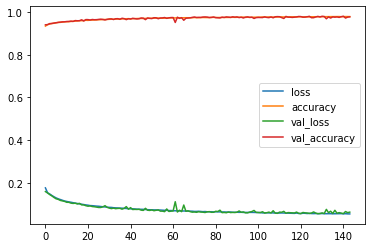

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [66]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16404   591]
 [  195 16800]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16995
           1       0.97      0.99      0.98     16995

    accuracy                           0.98     33990
   macro avg       0.98      0.98      0.98     33990
weighted avg       0.98      0.98      0.98     33990



In [67]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])
    return classifier

early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

NameError: name 'KerasClassifier' is not defined

## 4. Model Deployment
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, created web app with Flask API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<img src="logo.png" class="img-fluid" width="1000" height="300">

___